In [304]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
from pandas.plotting import autocorrelation_plot
from datetime import datetime
from matplotlib.pylab import rcParams
from pandas.core import datetools
rcParams['figure.figsize'] = 15, 7
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.stattools import adfuller
from scipy import  stats
import statsmodels.api as sm

In [177]:
##################################################
#               LOAD DATA                        #
##################################################
train03 = pd.read_csv('BATADAL_dataset03.csv')
train04 = pd.read_csv('BATADAL_dataset04.csv')
# (8761, 45)
# (4177, 45)
row = 10
# print(train03.shape, train03.iloc[row],'\n',train04.shape, train04.iloc[row])
# print(train03.head())
# print( '\n Data Types:', type(train03['DATETIME'][0]))

In [283]:
dateparse = lambda dates: pd.datetime.strptime(dates, '%d/%m/%y %H')
series = pd.read_csv('BATADAL_dataset04.csv', sep='\s*,\s*',parse_dates=['DATETIME'], index_col='DATETIME', squeeze=True,date_parser=dateparse)
print(series.index)

C:\Users\zinaw\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  


DatetimeIndex(['2016-07-04 00:00:00', '2016-07-04 01:00:00',
               '2016-07-04 02:00:00', '2016-07-04 03:00:00',
               '2016-07-04 04:00:00', '2016-07-04 05:00:00',
               '2016-07-04 06:00:00', '2016-07-04 07:00:00',
               '2016-07-04 08:00:00', '2016-07-04 09:00:00',
               ...
               '2016-12-24 15:00:00', '2016-12-24 16:00:00',
               '2016-12-24 17:00:00', '2016-12-24 18:00:00',
               '2016-12-24 19:00:00', '2016-12-24 20:00:00',
               '2016-12-24 21:00:00', '2016-12-24 22:00:00',
               '2016-12-24 23:00:00', '2016-12-25 00:00:00'],
              dtype='datetime64[ns]', name='DATETIME', length=4177, freq=None)


In [175]:
# print(train03_parse.loc['2014-01-06 00:00:00'])

In [90]:
# train03.describe()

In [252]:
print(list(series))

['L_T1', 'L_T2', 'L_T3', 'L_T4', 'L_T5', 'L_T6', 'L_T7', 'F_PU1', 'S_PU1', 'F_PU2', 'S_PU2', 'F_PU3', 'S_PU3', 'F_PU4', 'S_PU4', 'F_PU5', 'S_PU5', 'F_PU6', 'S_PU6', 'F_PU7', 'S_PU7', 'F_PU8', 'S_PU8', 'F_PU9', 'S_PU9', 'F_PU10', 'S_PU10', 'F_PU11', 'S_PU11', 'F_V2', 'S_V2', 'P_J280', 'P_J269', 'P_J300', 'P_J256', 'P_J289', 'P_J415', 'P_J302', 'P_J306', 'P_J307', 'P_J317', 'P_J14', 'P_J422', 'ATT_FLAG']


In [189]:
L_group = ['L_T1', 'L_T2', 'L_T3', 'L_T4', 'L_T5', 'L_T6', 'L_T7']
FS_1_6_group = ['F_PU1', 'S_PU1', 'F_PU2', 'S_PU2', 'F_PU3', 'S_PU3', 'F_PU4', 'S_PU4', 'F_PU5', 'S_PU5', 'F_PU6', 'S_PU6']
FS_7_12_group = [ 'F_PU7', 'S_PU7', 'F_PU8', 'S_PU8', 'F_PU9', 'S_PU9', 'F_PU10', 'S_PU10', 'F_PU11', 'S_PU11', 'F_V2', 'S_V2']
P_group = ['P_J280', 'P_J269', 'P_J300', 'P_J256', 'P_J289', 'P_J415', 'P_J302', 'P_J306', 'P_J307', 'P_J317', 'P_J14', 'P_J422']

In [199]:
# train04_parse_L_Group = train04_parse[['L_T1', 'L_T2', 'L_T3', 'L_T4', 'L_T5', 'L_T6', 'L_T7']]
# train04_parse_FS_1_6_group = train04_parse[FS_1_6_group]
# train04_parse_FS_7_12_group = train04_parse[FS_7_12_group]
# train04_parse_P_group = train04_parse[P_group]


# plt.plot(train04_parse_L_Group)
# plt.show()
# train04_parse.plot(column = FS_1_6_group)
# plt.show()
# train04_parse.plot(column = FS_7_12_group)
# plt.show()
# train04_parse.plot(column = P_group)
# plt.show()

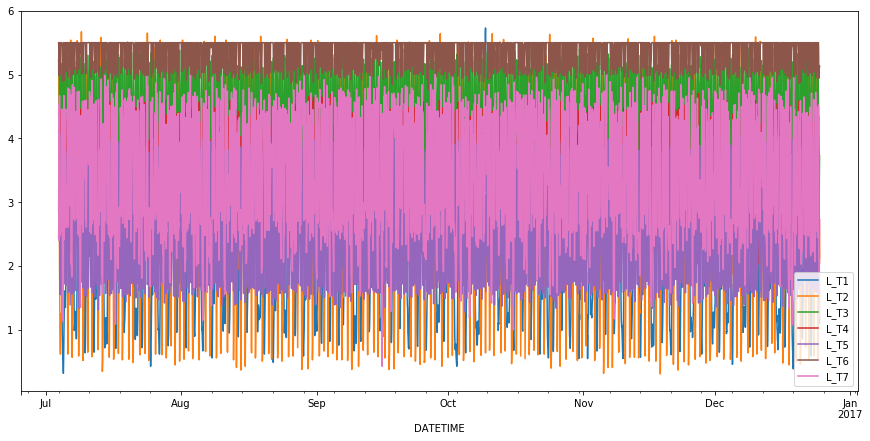

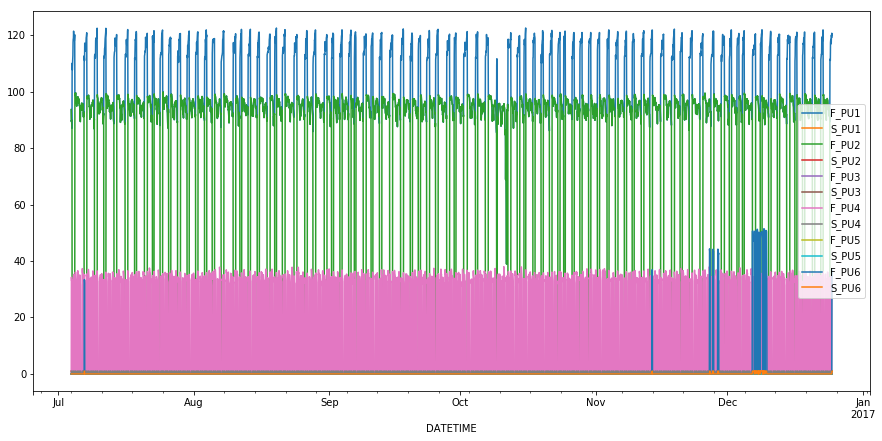

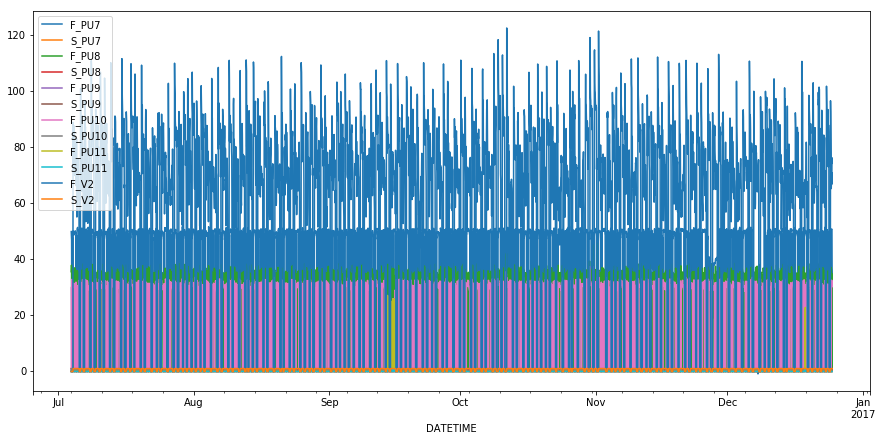

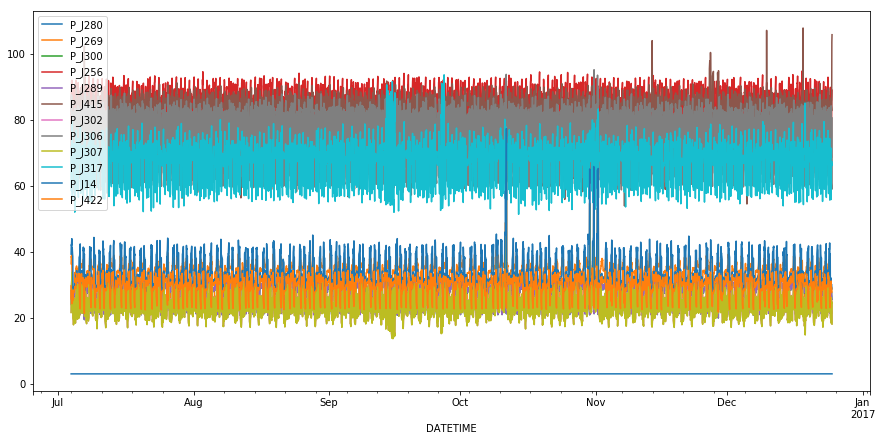

In [257]:
# Check Stationarity of a Time Series
# print(series.head())
series[L_group].plot()
plt.show()
series[FS_1_6_group].plot()
plt.show()
series[FS_7_12_group].plot()
plt.show()
series[P_group].plot()
plt.show()

In [ ]:
# autocorrelation_plot(series[L_group])
# plt.show()
# autocorrelation_plot(series[FS_1_6_group])
# plt.show()
# autocorrelation_plot(series[FS_7_12_group])
# plt.show()
# autocorrelation_plot(series[P_group])
# plt.show()

In [ ]:
# 1.获取被观测系统时间序列数据；
# 2.对数据绘图，观测是否为平稳时间序列；对于非平稳时间序列要先进行d阶差分运算，化为平稳时间序列；
# 3.经过第二步处理，已经得到平稳时间序列。要对平稳时间序列分别求得其自相关系数ACF 和偏自相关系数PACF ，通过对自相关图和偏自相关图的分析，得到最佳的阶层 p 和阶数 q
# 4.由以上得到的d、q、p ，得到ARIMA模型。然后开始对得到的模型进行模型检验。

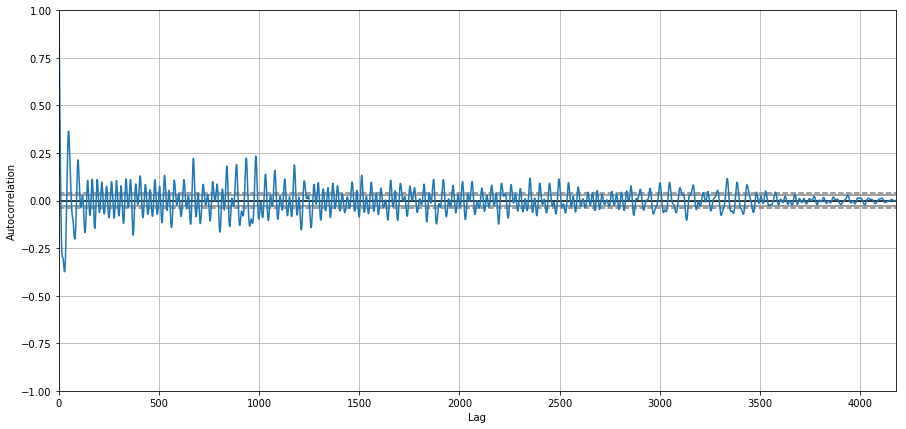

2.1913768400168945e-28


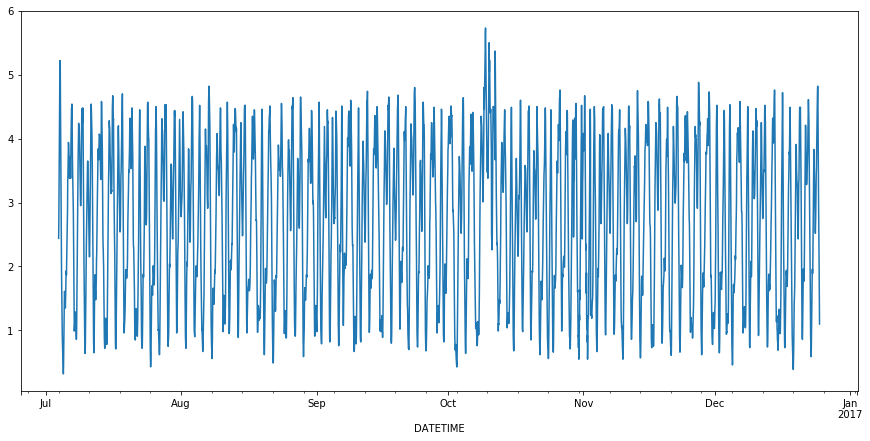

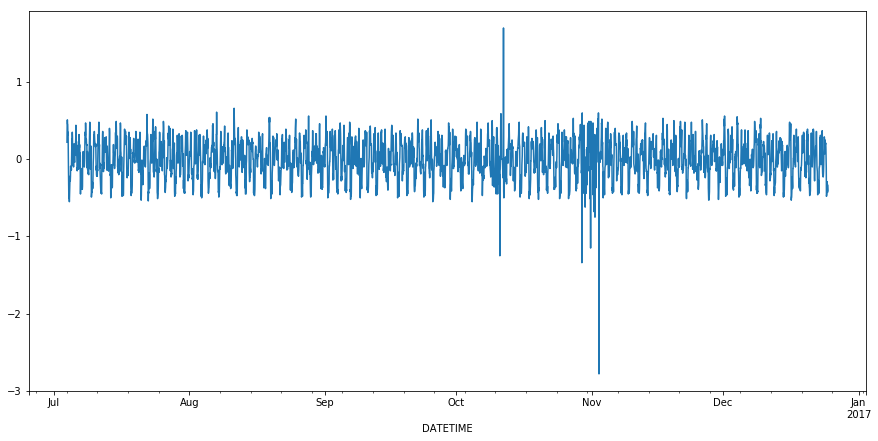

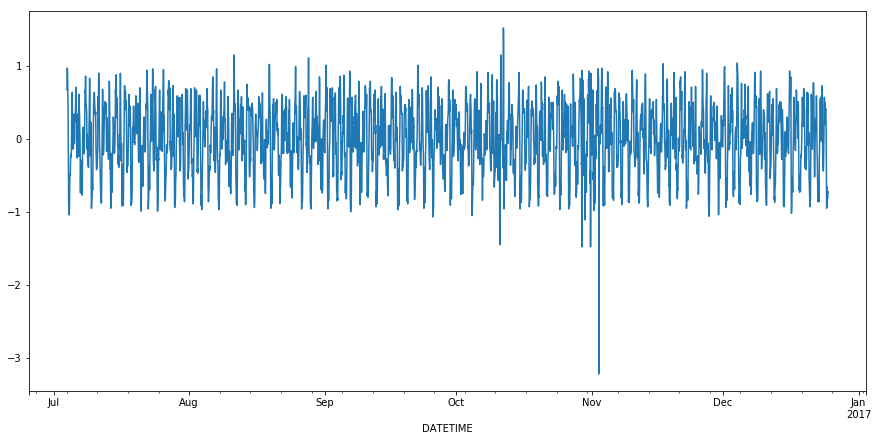

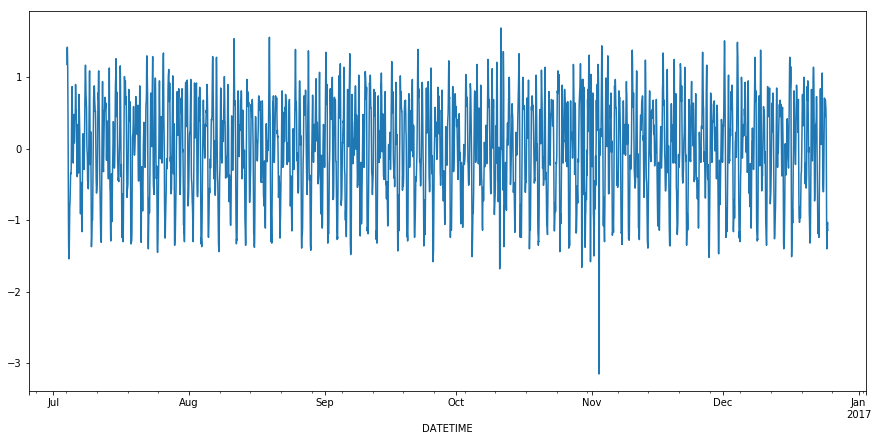

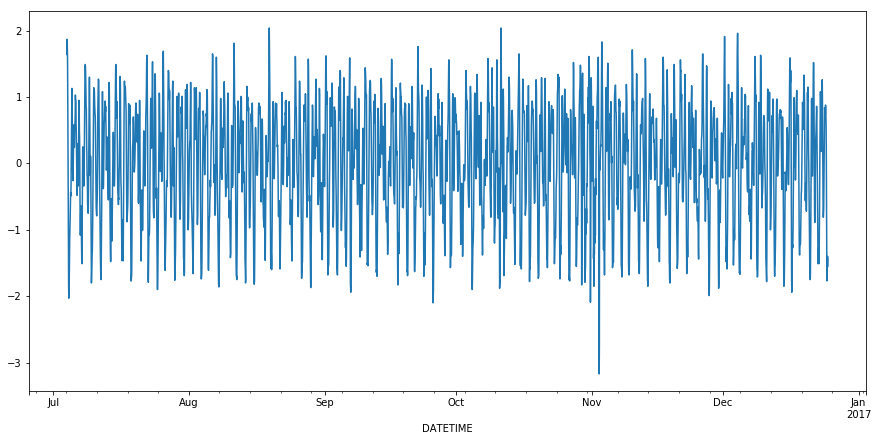

In [302]:
# find optimal diff
autocorrelation_plot(series['L_T1'])
plt.show()
def test_stationarity(timeseries):
    dftest = adfuller(timeseries, autolag='AIC')
    return dftest[1]
stationarity = test_stationarity(series['L_T1'])
print(stationarity)
series['L_T1'].plot()
plt.show()
diff1 = series['L_T1'].diff(1)
diff1.plot()
plt.show()
diff2 = series['L_T1'].diff(2)
diff2.plot()
plt.show()
diff3 = series['L_T1'].diff(3)
diff3.plot()
plt.show()
diff4 = series['L_T1'].diff(4)
diff4.plot()
plt.show()

In [ ]:
#reconstruct data


In [ ]:
dta= series['L_T1'].diff(4)
fig = plt.figure(figsize=(12,8))
ax1=fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(dta,lags=4176,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(dta,lags=4176,ax=ax2)

In [ ]:
arma_mod1 = sm.tsa.ARMA(dta,(7,0)).fit()
print(arma_mod1.aic,arma_mod1.bic,arma_mod1.hqic)
arma_mod2 = sm.tsa.ARMA(dta,(0,1)).fit()
print(arma_mod2.aic,arma_mod2.bic,arma_mod2.hqic)
arma_mod3 = sm.tsa.ARMA(dta,(7,1)).fit()
print(arma_mod3.aic,arma_mod3.bic,arma_mod3.hqic)
arma_mod4 = sm.tsa.ARMA(dta,(8,0)).fit()
print(arma_mod4.aic,arma_mod4.bic,arma_mod4.hqic)

In [ ]:
model = ARIMA(series['L_T1'], order=(2000,1,0))
# This sets the lag value to 5 for autoregression, uses a difference order of 1 to make the 
# time series stationary, and uses a moving average model of 0.
model_fit = model.fit(disp=0)
print(model_fit.summary())
# plot residual errors
residuals = DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()
residuals.plot(kind='kde')
pyplot.show()
print(residuals.describe())

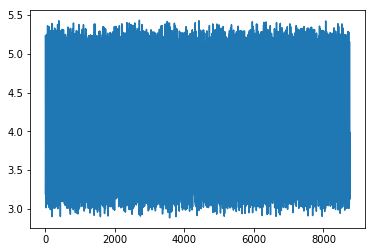

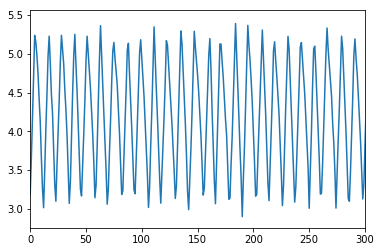

In [58]:
plt.plot(train03['L_T3'])
# plt.xlim(0,300)
plt.show()
plt.plot(train03['L_T3'])
plt.xlim(0,300)
plt.show()